#### Importing pandas as pd

In [1]:
import pandas as pd

#### Loading DataSet

In [4]:
DataFile = 'DataFiles/train.csv'

In [6]:
DataFrame = pd.read_csv(DataFile)

#### Inspect DataSet 

In [9]:
DataFrame.head(20)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [11]:
DataFrame.shape

(3000888, 6)

In [13]:
DataFrame.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [15]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [17]:
DataFrame.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [19]:
# Check for missing values
print(DataFrame.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [26]:
# Convert 'Date' column to datetime format
DataFrame['date'] = pd.to_datetime(DataFrame['date'], errors='coerce')

# Drop any rows where 'Date' conversion failed
df = DataFrame.dropna(subset=['date'])

# Set 'Date' column as the index
df.set_index('date', inplace=True)

In [30]:
# Resample data to monthly sales (sum sales per month)
df_monthly = df.resample('ME').sum()

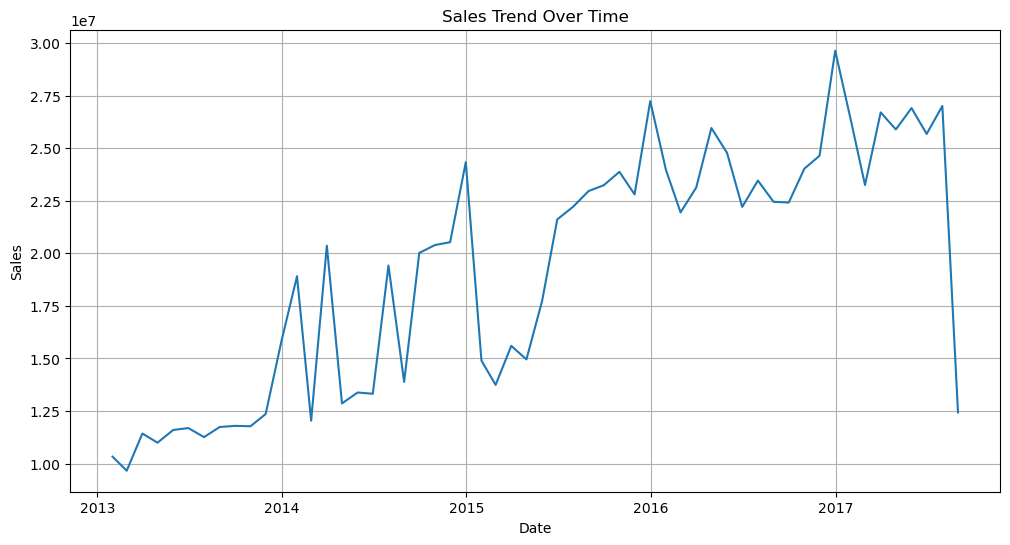

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x=df_monthly.index, y=df_monthly['sales'])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


C:\Users\Ms Konya\AppData\Local\Temp\ipykernel_6988\3497747495.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_monthly.index[-1], periods=12, freq='M'), forecast, label='Forecasted Sales', linestyle='dashed')


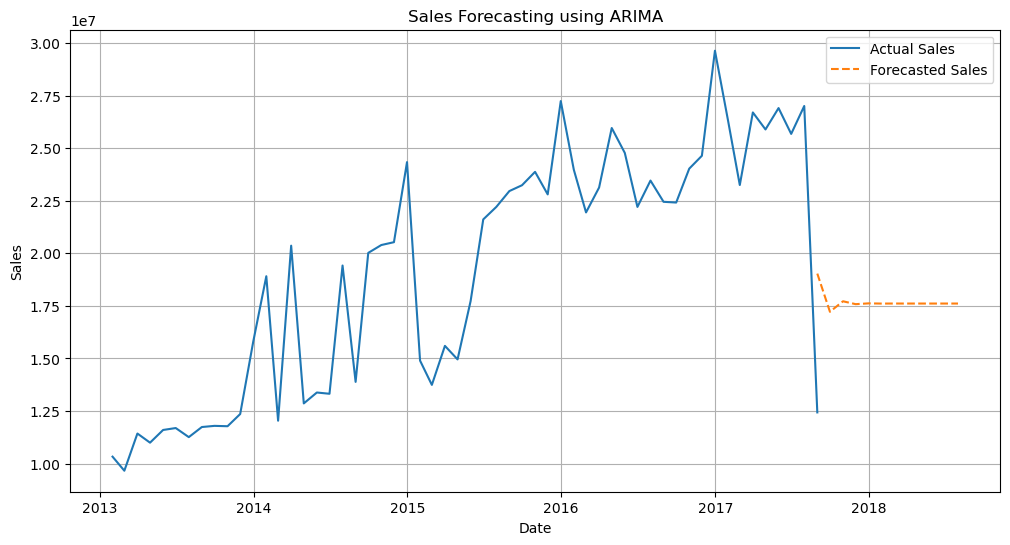

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (p=1, d=1, q=1 as an initial guess)
model = ARIMA(df_monthly['sales'], order=(1,1,1))
model_fit = model.fit()

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the actual sales and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['sales'], label='Actual Sales')
plt.plot(pd.date_range(df_monthly.index[-1], periods=12, freq='M'), forecast, label='Forecasted Sales', linestyle='dashed')
plt.title("Sales Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
forecast_df = pd.DataFrame({'Date': pd.date_range(df_monthly.index[-1], periods=12, freq='M'), 'Forecasted Sales': forecast})
forecast_df.to_csv("sales_forecast.csv", index=False)
print("Forecast exported for Tableau visualization.")


C:\Users\Ms Konya\AppData\Local\Temp\ipykernel_6988\1352650891.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_df = pd.DataFrame({'Date': pd.date_range(df_monthly.index[-1], periods=12, freq='M'), 'Forecasted Sales': forecast})


Forecast exported for Tableau visualization.


,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [60]:
df["family"].nunique()

33

In [76]:
df["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [82]:
df_automotive = df[df["family"]=="AUTOMOTIVE"]

In [84]:
df_automotive

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,33,10,AUTOMOTIVE,0.0,0
2013-01-01,66,11,AUTOMOTIVE,0.0,0
2013-01-01,99,12,AUTOMOTIVE,0.0,0
2013-01-01,132,13,AUTOMOTIVE,0.0,0
...,...,...,...,...,...
2017-08-15,3000723,54,AUTOMOTIVE,8.0,0
2017-08-15,3000756,6,AUTOMOTIVE,7.0,0
2017-08-15,3000789,7,AUTOMOTIVE,5.0,0
